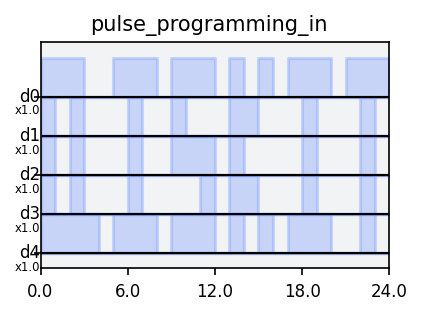

In [1]:
from qiskit import pulse
from qiskit.visualization import SchedStyle

dc = pulse.DriveChannel
d0, d1, d2, d3, d4 = dc(0), dc(1), dc(2), dc(3), dc(4)

with pulse.build(name='pulse_programming_in') as pulse_prog:
    pulse.play([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1], d0)
    pulse.play([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0], d1)
    pulse.play([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], d2)
    pulse.play([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0], d3)
    pulse.play([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0], d4)

style = SchedStyle(figsize=(3, 2), title_font_size=10, axis_font_size=8)
pulse_prog.draw(style=style)

In [2]:
from qiskit import pulse
from qiskit.test.mock import FakeArmonk

backend = FakeArmonk()

with pulse.build(backend) as drive_sched:
    d0 = pulse.drive_channel(0)
    print(d0)

DriveChannel(0)


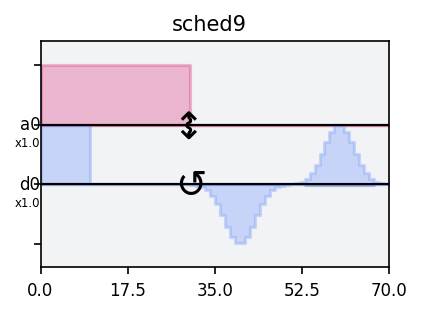

In [3]:
from qiskit import pulse
from qiskit.test.mock import FakeArmonk
from qiskit.visualization import SchedStyle

backend = FakeArmonk()

with pulse.build(backend) as drive_sched:
    d0 = pulse.drive_channel(0)
    a0 = pulse.acquire_channel(0)

    pulse.play(pulse.library.Constant(10, 1.0), d0)
    pulse.delay(20, d0)
    pulse.shift_phase(3.14/2, d0)
    pulse.set_phase(3.14, d0)
    pulse.shift_frequency(1e7, d0)
    pulse.set_frequency(5e9, d0)

    with pulse.build() as temp_sched:
        pulse.play(pulse.library.Gaussian(20, 1.0, 3.0), d0)
        pulse.play(pulse.library.Gaussian(20, -1.0, 3.0), d0)

    pulse.call(temp_sched)
    pulse.acquire(30, a0, pulse.MemorySlot(0))

style = SchedStyle(figsize=(3, 2), title_font_size=10, axis_font_size=8)
drive_sched.draw(style=style)

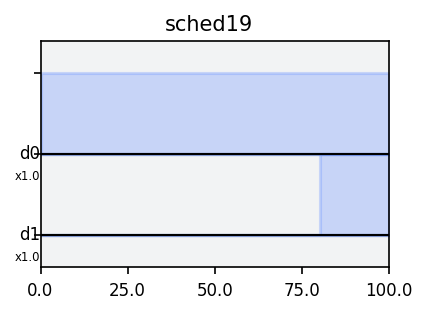

In [4]:
from qiskit import pulse
from qiskit.visualization import SchedStyle

d0 = pulse.DriveChannel(0)
d1 = pulse.DriveChannel(1)

with pulse.build() as pulse_prog:
    with pulse.align_right():
        # this pulse will start at t=0
        pulse.play(pulse.Constant(100, 1.0), d0)
        # this pulse will start at t=80
        pulse.play(pulse.Constant(20, 1.0), d1)

style = SchedStyle(figsize=(3, 2), title_font_size=10, axis_font_size=8)
pulse_prog.draw(style=style)

In [5]:
from qiskit import pulse
from qiskit.test.mock import FakeArmonk

backend = FakeArmonk()

with pulse.build(backend) as measure_sched:
    mem_slot = pulse.measure(0)
    print(mem_slot)

MemorySlot(0)


In [6]:
import math

from qiskit import pulse
from qiskit.test.mock import FakeArmonk

backend = FakeArmonk()

with pulse.build(backend) as u3_sched:
    pulse.u3(math.pi, 0, math.pi, 0)

In [7]:
from qiskit import pulse

from qiskit.test.mock import FakeArmonk

backend = FakeArmonk()

with pulse.build(backend) as u3_sched:
    print('Number of qubit in backend: '.format(pulse.num_qubits()))

    samples = 160
    print('There are {} samples in {} seconds'.format(
        samples, pulse.samples_to_seconds(160)))

    seconds = 1e-6
    print('There are {} seconds in {} samples.'.format(
        seconds, pulse.seconds_to_samples(1e-6)))

Number of qubit in backend: 
There are 160 samples in 3.5555555555555554e-08 seconds
There are 1e-06 seconds in 4500 samples.
